"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

### `Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [26]:
import pandas as pd
import numpy as np
# Provided dictionary and labels
data = {
    'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes',
              'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
    'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5],
    'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
    'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no', 'yes']
}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

# Create the DataFrame
df = pd.DataFrame(data, index=labels)
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


### `Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [ ]:
result = df.loc[['a','c','g'],['birds','age']]
# Display the result
result

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [9]:
# The result is a DataFrame with the specified rows and columns
resultant_df = df[df['visits'] < 4]
resultant_df 

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


### `Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [10]:
nan_rows = df[df['age'].isna() & df['visits'].isna()]
nan_rows

,birds,age,visits,priority


In [ ]:
# Fill NaN in each column with its mode (most frequent value)
for col in df.columns:
    mode_val = df[col].mode().iloc[0]  # Get first mode (mode() may return multiple)
    df[col].fillna(mode_val)
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


### `Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [14]:
Cranes = df[df['birds'] == 'Cranes']['visits'].sum()
Cranes

np.int64(14)

In [16]:
bird_counts = df['birds'].value_counts()
bird_counts

birds
Cranes        5
spoonbills    4
plovers       2
Name: count, dtype: int64

In [17]:
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(2)

In [28]:
df.drop_duplicates(inplace=True)
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [27]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,birds,age,visits,priority
k,Cranes,3.5,2,yes


## Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

### `Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [1]:
import pandas as pd

# Load the IPL matches dataset (update the file path as needed)
# Assuming the dataset is downloaded from the provided Kaggle link
ipl_data = pd.read_csv('ipl-matches.csv')

# Define a dictionary to map old team names to current team names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}

# Identify columns that contain team names
# From the dataset, relevant columns are: 'Team1', 'Team2', 'TossWinner', 'WinningTeam'
team_columns = ['Team1', 'Team2', 'TossWinner', 'WinningTeam']

# Replace old team names with current team names in the specified columns
for column in team_columns:
    ipl_data[column] = ipl_data[column].replace(team_name_mapping)

ipl_data

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Capitals,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Punjab Kings,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [3]:

# Verify that 'Gujrat Titans' and 'Gujrat Lions' remain distinct
# Check unique team names in 'Team1' and 'Team2' to confirm
unique_teams = pd.unique(ipl_data[['Team1', 'Team2']].values.ravel('K'))
unique_teams

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [5]:
ipl_data[['Team1','Team2']]

,Team1,Team2
0,Rajasthan Royals,Gujarat Titans
1,Royal Challengers Bangalore,Rajasthan Royals
2,Royal Challengers Bangalore,Lucknow Super Giants
3,Rajasthan Royals,Gujarat Titans
4,Sunrisers Hyderabad,Punjab Kings
...,...,...
945,Kolkata Knight Riders,Deccan Chargers
946,Mumbai Indians,Royal Challengers Bangalore
947,Delhi Capitals,Rajasthan Royals
948,Punjab Kings,Chennai Super Kings


In [4]:
ipl_data[['Team1','Team2']].values

array([['Rajasthan Royals', 'Gujarat Titans'],
       ['Royal Challengers Bangalore', 'Rajasthan Royals'],
       ['Royal Challengers Bangalore', 'Lucknow Super Giants'],
       ...,
       ['Delhi Capitals', 'Rajasthan Royals'],
       ['Punjab Kings', 'Chennai Super Kings'],
       ['Royal Challengers Bangalore', 'Kolkata Knight Riders']],
      shape=(950, 2), dtype=object)

In [2]:
ipl_data[['Team1','Team2']].values.ravel()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', ..., 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders'],
      shape=(1900,), dtype=object)

### `Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


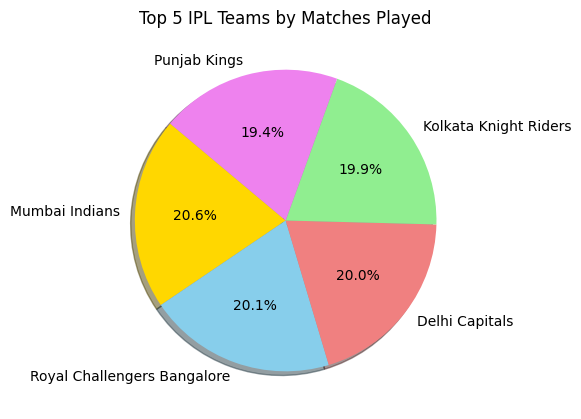

In [6]:
import matplotlib.pyplot as plt
# Get top 5 teams by number of matches played
top_5_teams = pd.concat([ipl_data['Team1'], ipl_data['Team2']]).value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(5.7, 5.6))
top_5_teams.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True, colors=['gold', 'skyblue', 'lightcoral', 'lightgreen', 'violet'])

plt.title('Top 5 IPL Teams by Matches Played')
plt.ylabel('')  # Hides y-label
plt.tight_layout()
plt.show()

### `Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.

In [6]:
# Filter matches where Mumbai Indians played and lost
mi_matches = ipl_data[(ipl_data['Team1'] == 'Mumbai Indians') | (ipl_data['Team2'] == 'Mumbai Indians')]
mi_losses = mi_matches[mi_matches['WinningTeam'] != 'Mumbai Indians']

# Count Player of the Match awards
potm_counts = mi_losses['Player_of_Match'].value_counts()

# Get the player with the most awards
top_player = potm_counts.idxmax()
top_player

'KL Rahul'

In [9]:
potm_counts

Player_of_Match
KL Rahul         4
SK Raina         4
SPD Smith        4
JC Buttler       3
KC Sangakkara    3
                ..
PP Ojha          1
Sohail Tanvir    1
KD Karthik       1
AC Gilchrist     1
MV Boucher       1
Name: count, Length: 68, dtype: int64

### `Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [8]:
import pandas as pd

def team1_vs_team2(team1, team2):
    # Filter matches between team1 and team2 (in either order)
    matches = ipl_data[
        ((ipl_data['Team1'] == team1) & (ipl_data['Team2'] == team2)) |
        ((ipl_data['Team1'] == team2) & (ipl_data['Team2'] == team1))
    ]

    if matches.empty:
        print(f"No matches found between {team1} and {team2}.")
        return

    # Calculate win-loss record
    total_matches = len(matches)
    team1_wins = len(matches[matches['WinningTeam'] == team1])
    team2_wins = len(matches[matches['WinningTeam'] == team2])
    no_result = len(matches[matches['WinningTeam'].isna()])

    # Count POTM awards
    potm_counts = matches['Player_of_Match'].value_counts()
    top_player = potm_counts.idxmax() if not potm_counts.empty else "No POTM data"
    top_count = potm_counts.max() if not potm_counts.empty else 0

    # Print the dashboard
    print("--"*40)
    print(f"Head-to-Head: {team1} vs {team2}")
    print("--"*40)
    print(f"Total Matches: {total_matches}")
    print("--"*40)
    print(f"{team1} Wins: {team1_wins}")
    print("--"*40)
    print(f"{team2} Wins: {team2_wins}")
    print("--"*40)
    print(f"No Result: {no_result}")    
    print("--"*40)
    print(f"Most Player of the Match Awards: {top_player} ({top_count} awards)")
    print("--"*40)

# Example usage
team1_vs_team2('Kolkata Knight Riders', 'Royal Challengers Bangalore')

--------------------------------------------------------------------------------
Head-to-Head: Kolkata Knight Riders vs Royal Challengers Bangalore
--------------------------------------------------------------------------------
Total Matches: 30
--------------------------------------------------------------------------------
Kolkata Knight Riders Wins: 16
--------------------------------------------------------------------------------
Royal Challengers Bangalore Wins: 14
--------------------------------------------------------------------------------
No Result: 0
--------------------------------------------------------------------------------
Most Player of the Match Awards: CH Gayle (4 awards)
--------------------------------------------------------------------------------


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*


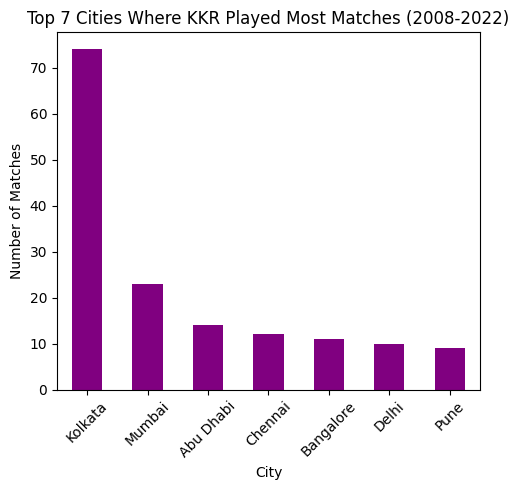

Top 7 cities where Kolkata Knight Riders played most matches:
City
Kolkata      74
Mumbai       23
Abu Dhabi    14
Chennai      12
Bangalore    11
Delhi        10
Pune          9
Name: count, dtype: int64


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter matches where Kolkata Knight Riders played
kkr_matches = ipl_data[(ipl_data['Team1'] == 'Kolkata Knight Riders') | (ipl_data['Team2'] == 'Kolkata Knight Riders')]

# Count matches per city
city_counts = kkr_matches['City'].value_counts()

# Get the top 7 cities
top_7_cities = city_counts.head(7)

# Plot the bar chart
plt.figure(figsize=(5, 5))
top_7_cities.plot(kind='bar', color='purple')
plt.title('Top 7 Cities Where KKR Played Most Matches (2008-2022)')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top 7 cities and their match counts
print("Top 7 cities where Kolkata Knight Riders played most matches:")
print(top_7_cities)

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [56]:
import pandas as pd
import numpy as np

# Filter matches for season 2011 where Mumbai Indians won
mi_2011_wins_by_runs = ipl_data[
    (ipl_data['Season'] == '2011') & 
    (ipl_data['WinningTeam'] == 'Mumbai Indians') & 
    (ipl_data['WonBy'] == 'Runs')
]

# Calculate the average margin of victory (by runs)
average_margin = mi_2011_wins_by_runs['Margin'].mean()

# Print the result
if mi_2011_wins_by_runs.empty:
    print("Mumbai Indians had no wins by runs in 2011.")
else:
    print(f"Average margin of victory (by runs) for Mumbai Indians in 2011: {average_margin:.2f} runs")

Average margin of victory (by runs) for Mumbai Indians in 2011: 24.20 runs
